In [1]:
#Нейро-нечеткие системы
#Лабораторная работа №4

#Задача: классификация текстов

In [2]:
#мешок слов

%matplotlib inline
import os

from ipywidgets import Select, SelectMultiple, interactive,  Layout, Box, Label

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
from sklearn.model_selection import train_test_split
import sklearn.feature_selection 
import nltk
#перед использованием раскомментировать
#nltk.download("stopwords")
#nltk.download('wordnet')

In [3]:
##!pip install gensim==3.4.0
##!pip install smart_open==1.9.0
#import gensim

In [4]:
#поиск всех файлов в папке
files = []
for file in os.listdir("./datasets"):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('raw_text.csv', 'stars.csv', 'test.csv', 'train.csv'), value='raw_…

In [25]:
#оригинальный датасет
df = pd.read_csv("./datasets/" + fileselect.value, delimiter=",")
df.head(10)

,text,label
0,The following content is\nprovided under a Cre...,Calculus
1,"In this sequence of segments,\nwe review some ...",Probability
2,The following content is\nprovided under a Cre...,CS
3,The following\ncontent is provided under a Cre...,Algorithms
4,The following\ncontent is provided under a Cre...,Algorithms
5,The following content is\nprovided under a Cre...,Calculus
6,The following content is\nprovided under a Cre...,Algorithms
7,Welcome back. We were in the midst of figuring...,Diff. Eq.
8,BEN HARRIS: Hi. I'm Ben. Today we are going to...,Linear Algebra
9,"Let's say we have some function,\nf, and it's ...",Linear Algebra


In [26]:
#выбрать столбец, который будет отвечать за тип
yselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
yselect

Select(description='Select file:', options=('text', 'label'), value='text')

In [27]:
#выбрать столбец, который будет отвечать за текст
xselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
xselect

Select(description='Select file:', options=('text', 'label'), value='text')

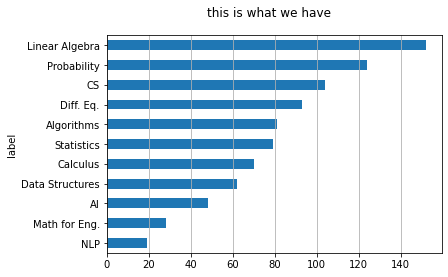

In [28]:
#просто смотрим какие у нас есть лейблы
fig, ax = plt.subplots()
fig.suptitle("this is what we have", fontsize=12)
df[yselect.value].reset_index().groupby(yselect.value).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [11]:
#препроцессинг
def preproc(text):
    #убираем пунктуацию
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    #токенизируем
    lst_text = text.split()
    
    #убираем стоп-слова
    stop_words = nltk.corpus.stopwords.words("english")
    lst_text = [word for word in lst_text if word not in 
                    stop_words]
                
    #стемминг
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]
                
    #лемматизация
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
            
    #конец обработки
    text = " ".join(lst_text)
    return text

In [12]:
df["text_clean"] = df[xselect.value].apply(lambda x: preproc(x))
df["text_clean"].head(10)

0    reuter shortsel wall street dwindlingband ultr...
1    reuter privat invest firm carlyl groupwhich re...
2    reuter soar crude price plu worriesabout econo...
3    reuter author halt oil exportflow main pipelin...
4    afp tearaway world oil price toppl record stra...
5    reuter stock end slightli higher fridaybut sta...
6    ap asset nation retail money market mutual fun...
7    usatodaycom retail sale bounc back bit juli ne...
8    forbescom earn phd sociolog danni bazil riley ...
9    new york reuter shortsel wall street dwindl ba...
Name: text_clean, dtype: object

In [13]:
x = df["text_clean"].copy()
y = df[yselect.value].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,3))

In [15]:
corpus = x_train
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [16]:
dic_vocabulary

{'suprem': 8677,
 'court': 2253,
 'chief': 1798,
 'justic': 4710,
 'hospit': 4102,
 'undergo': 9334,
 'surgeri': 8686,
 'cancer': 1611,
 'suprem court': 8678,
 'glass': 3695,
 'door': 2700,
 'anaheim': 730,
 'open': 6268,
 'lobbi': 5100,
 'calm': 1593,
 'earli': 2790,
 'thursday': 8996,
 'afternoon': 556,
 'one': 6221,
 'chair': 1725,
 'near': 5846,
 'entranc': 2987,
 'earli thursday': 2799,
 'berlin': 1232,
 'reuter': 7387,
 'treasuri': 9163,
 'secretari': 7875,
 'john': 4646,
 'snow': 8236,
 'said': 7652,
 'sunday': 8652,
 'assur': 953,
 'member': 5419,
 'group': 3822,
 '20': 119,
 'nation': 5808,
 'washington': 9615,
 'slash': 8189,
 'deficit': 2474,
 'blame': 1318,
 'fall': 3151,
 'dollar': 2680,
 'repeat': 7297,
 'call': 1592,
 'stronger': 8581,
 'european': 3032,
 'growth': 3839,
 'reuter treasuri': 7443,
 'treasuri secretari': 9168,
 'secretari john': 7882,
 'john snow': 4652,
 'said sunday': 7672,
 'treasuri secretari john': 9169,
 'secretari john snow': 7883,
 'disappoint': 26

Text(0.5, 1.0, 'Sparse Matrix Sample')

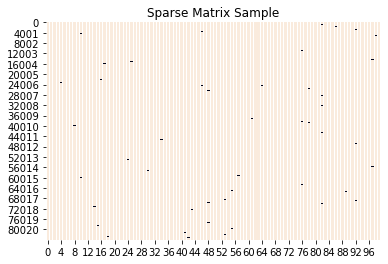

In [17]:
#карта слов
sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [18]:
#попытка уменьшить плотность матрицы
X_names = vectorizer.get_feature_names()
p_value_limit = 0.80
dtf_features = pd.DataFrame()
for cat in np.unique(y_train):
    chi2, p = feature_selection.chi2(X_train, y_train==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")
    
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

# 1:
  . selected features: 7351
  . top features: abduct,abu,accus,afghan,afghanistan,afp,african,aid,aid worker,al qaeda
 
# 2:
  . selected features: 8099
  . top features: 39 game,39t,62,63,64,76,alex,allstar,american leagu,anaheim
 
# 3:
  . selected features: 7166
  . top features: 39 biggest,39 largest,50 barrel,account,agre,agre buy,agre pay,air line,airbu,airlin
 
# 4:
  . selected features: 7132
  . top features: access,amd,announc,antiviru,appl,appl comput,applic,astronaut,astronom,avail
 


In [19]:
classifier = naive_bayes.MultinomialNB()
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
model["classifier"].fit(X_train, y_train)

X_test = x_test
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)
                                

In [20]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("По классам:")
print(metrics.classification_report(y_test, predicted))
    

Accuracy: 0.89
По классам:
              precision    recall  f1-score   support

           1       0.91      0.88      0.89      8954
           2       0.94      0.97      0.95      9112
           3       0.86      0.85      0.86      9052
           4       0.85      0.86      0.86      8882

    accuracy                           0.89     36000
   macro avg       0.89      0.89      0.89     36000
weighted avg       0.89      0.89      0.89     36000



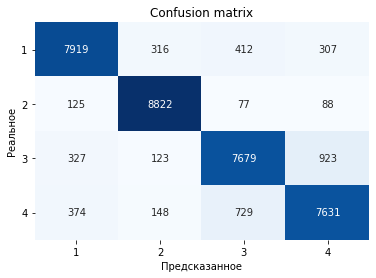

In [21]:
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Предсказанное", ylabel="Реальное", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.show()

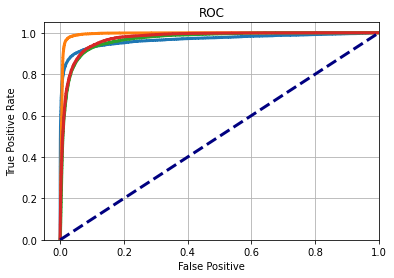

In [22]:
fig, ax = plt.subplots()
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive', 
          ylabel="True Positive Rate", 
          title="ROC")
#ax.legend(loc="lower right")
ax.grid(True)
plt.show()

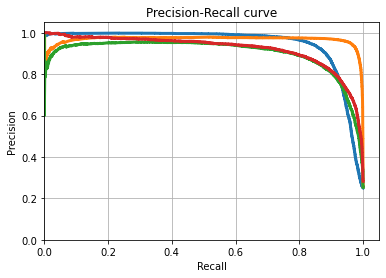

In [23]:
fig, ax = plt.subplots()
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
#ax.legend(loc="best")
ax.grid(True)
plt.show()